In [5]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt


In [22]:
class GA():
    def __init__(self,c_length, p_size, p_crossover,p_mutation,max_generations):
        self.chromosome_length=c_length
        self.population_size=p_size
        self.prob_crossover=p_crossover
        self.prob_mutation=p_mutation
        self.max_generations=max_generations
        self.individuals=[]



    def decode(self,chromosome):
        binary_str=''.join([str(elem) for elem in chromosome])

        str1=binary_str[0:8]
        str2=binary_str[8:]

        x1=int(str1,2)
        x2=int(str2,2)

        x1=((3+3)/((2**8)-1))*x1-3
        x2=((3+3)/((2**8)-1))*x2-3

        return x1,x2

    def fitness(self,chromosome):
        x,y=self.decode(chromosome)

        z = 3 * (1 - x) ** 2 * (math.exp(-x ** 2 - (y + 1) ** 2)) - 10 * (x / 5 - x ** 3 - y ** 5) * (math.exp(-x ** 2 - y ** 2)) - 1 / 3 * (math.exp(-(x + 1) ** 2 - y ** 2))
        return z # we sum 60 in order to make all the funcion in z axis positive

    def init_population(self):
        for i in range(self.population_size):
            chromosome=[]
            for j in range(self.chromosome_length):
                p=np.random.rand()
                if p>=0.5:
                    chromosome.append(1)
                else:
                    chromosome.append(0)
            self.individuals.append(chromosome)
        
    def normalized_and_accumulated_fitness(self):
        normalized_fitness=[]
        accumulated_fitness=[]
        fitness_=[]
        acc=0

        for i in range(self.population_size):
            fitness_.append(self.fitness(self.individuals[i]))
            acc+=fitness_[i]
            accumulated_fitness.append(acc)
        
        for j in range(self.population_size):
            normalized_fitness.append(fitness_[j]/acc)
        return fitness_,normalized_fitness, accumulated_fitness

    def roulette_wheel(self):
        selected_individuals=[]
        fitness_,normalized_fitness,accumulated_fitness=self.normalized_and_accumulated_fitness()
        for i in range(2):
            eta=np.random.rand()*accumulated_fitness[-1]

            j=0

            while eta>accumulated_fitness[j]:
                j+=1
            
            selected_individuals.append(self.individuals[j])
        return selected_individuals

    def crossover(self):
        next_gen=[]
        while len(next_gen)<self.population_size:
            selected_individuals=self.roulette_wheel()

            l1=selected_individuals[0]
            l2=selected_individuals[1]

            p=np.random.rand()

            if p<self.prob_crossover:
                c=np.random.randint(1, self.chromosome_length-1)
                new_l1=l1[0:c]+l2[c:]
                new_l2=l2[0:c]+l1[c:]

                next_gen.append(new_l1)
                next_gen.append(new_l2)
        return next_gen

    def mutation(self,individuals):
        next_gen=individuals

        for i in range(len(next_gen)):
            for j in range(self.chromosome_length):
                p=np.random.rand()
                if p<self.prob_mutation:
                    next_gen[i][j]=1 if next_gen[i][j]==0 else 1
        return next_gen

    def perform_selection(self):
        mins,maxs,means,best_chromosomes=[],[],[],[]

        self.init_population()
        fitness_,normalized_fitness,acc_fitness=self.normalized_and_accumulated_fitness()

        best_chromosomes.append(self.individuals[np.argmax(fitness_)])

        max_=np.max(fitness_)
        mean_=np.mean(fitness_)
        min_=np.min(fitness_)

        mins.append(min_)
        maxs.append(max_)
        means.append(mean_)

        for i in range(self.max_generations):
            next_gen=self.crossover()
            next_gen=self.mutation(next_gen)
            self.individuals=next_gen
            fitness_,normalized_fitness,acc=self.normalized_and_accumulated_fitness()

            best_chromosomes.append(self.individuals[np.argmax(fitness_)])
            max_=np.max(fitness_)
            mean_=np.mean(fitness_)
            min_=np.min(fitness_)

            mins.append(min_)
            maxs.append(max_)
            means.append(mean_)
        
        return mins,maxs,means,best_chromosomes

def plot_ga(mins,maxs,means):
    c=[mins,maxs,means]

    #grid that contains the plotted images
    plt.figure(figsize=(23,6))

    x=np.arange(len(mins))

    plt.title("Fitness per generation")
    plt.plot(x,c[0])
    plt.plot(x,c[1])
    plt.plot(x,c[2])

    plt.show()

        



            


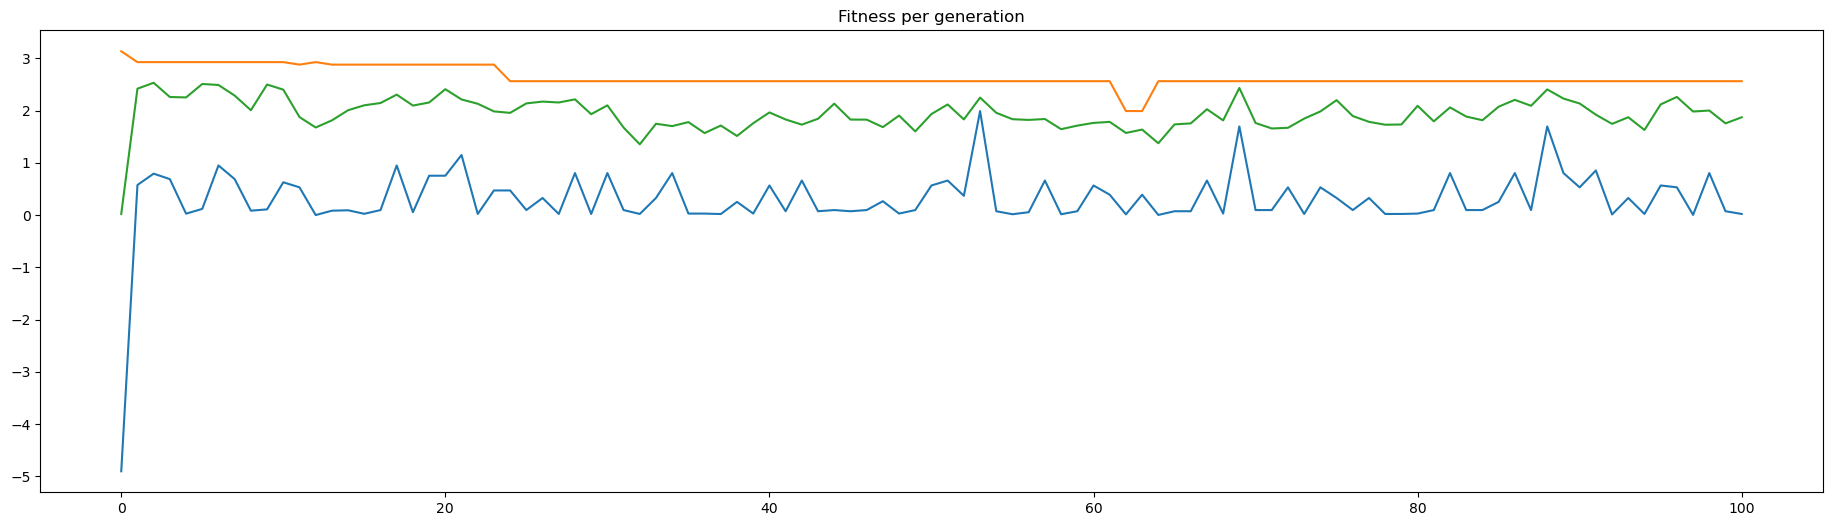

In [23]:
ga=GA(16,20,0.9,0.04,100)

mins,maxs,means,best_c=ga.perform_selection()

mins,maxs,means=np.array(mins),np.array(maxs),np.array(means)

plot_ga(mins,maxs,means)
max_index=np.argmax(maxs)

best_params=ga.decode(best_c[max_index])

